In [ ]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=71d08e1217f67d512efab0c1e4fc06185fc83cffc6d9e957c266caaabe23f6c1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# print your python version

import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
# the followings lines are the basic, may adjust depends on your needs

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import xgboost as xgb
import shap

2.2.2
1.26.4


In [ ]:
data = pd.read_excel('Sample Dataset.xlsx')
data.set_index('Date', inplace=True)

## Part I, EDA and Data Quality Check


In [ ]:
data.head(5)

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159


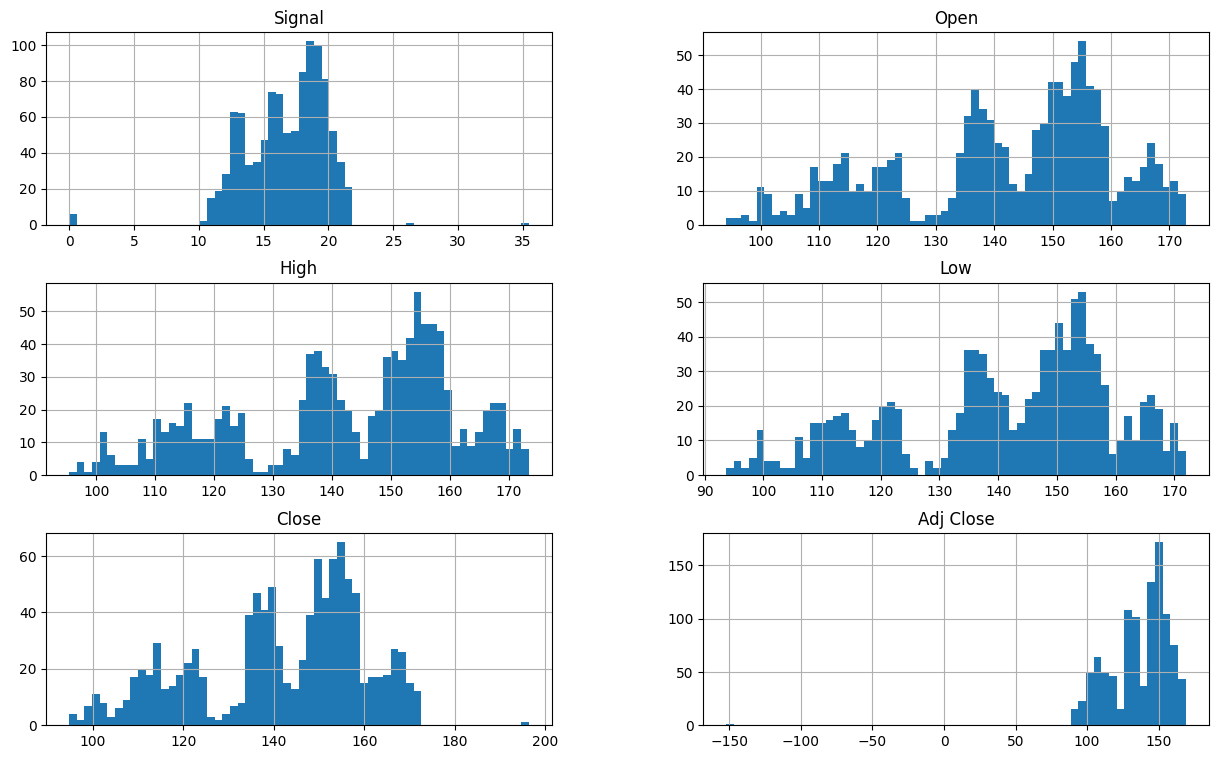

In [ ]:

data.hist(bins=60, figsize=(15,9))
plt.show()

In [ ]:
data.describe()

,Signal,Open,High,Low,Close,Adj Close
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,16.766190,141.847360,142.691801,140.907746,141.840973,136.341060
std,3.095783,18.475574,18.470255,18.404504,18.497010,21.427837
min,0.000000,94.080002,95.400002,93.639999,94.790001,-152.277847
25%,14.691150,132.132496,132.912495,130.542503,131.824993,125.290491
50%,17.298240,146.769997,147.959999,145.634995,146.885002,142.667732
75%,19.030890,155.367496,156.287495,154.422500,155.289993,151.798325
max,35.434147,172.789993,173.389999,171.949997,196.279999,168.842270


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(data, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True,  notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1038 entries, 2015-11-19 to 2020-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Signal     1038 non-null   float64
 1   Open       1038 non-null   float64
 2   High       1038 non-null   float64
 3   Low        1038 non-null   float64
 4   Close      1038 non-null   float64
 5   Adj Close  1038 non-null   float64
dtypes: float64(6)
memory usage: 56.8 KB


In [ ]:
#test duplicated
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## If and how to correct the values?

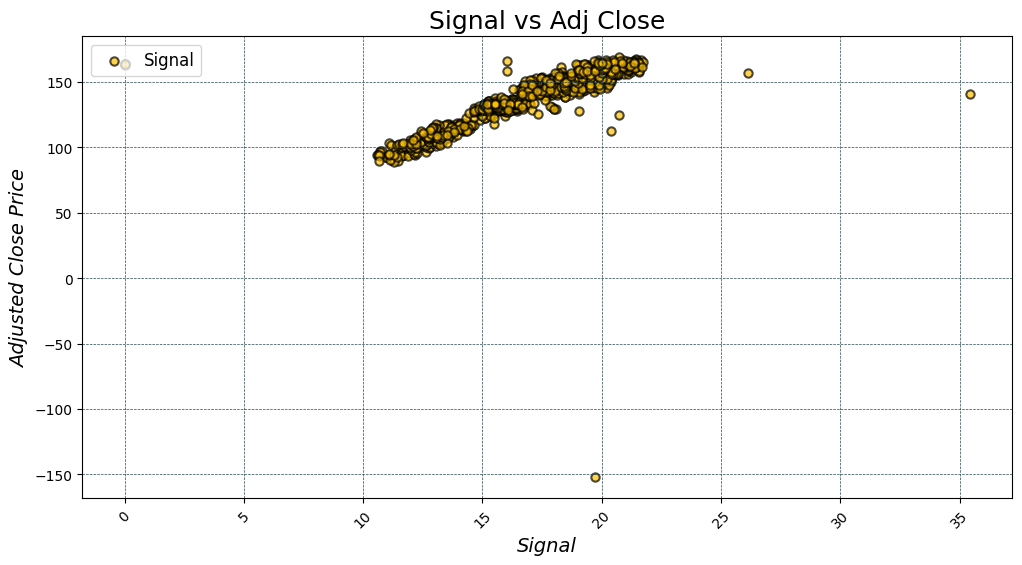

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Signal'], data['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Signal'], loc='upper left', fontsize=12)
plt.title('Signal vs Adj Close', fontsize=18)
plt.xlabel('Signal', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

In [ ]:
outlier_data=data[(data["Signal"]<5)|(data['Signal']>25)|(data["Adj Close"]<0)]
outlier_data

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2017-11-13,35.434147,145.929993,146.820007,145.500000,146.610001,140.849274
2018-10-09,26.124873,161.619995,162.740005,160.979996,161.190002,156.781219
2018-10-10,19.719477,160.820007,160.990005,156.360001,156.559998,-152.277847
2019-12-27,0.000000,167.119995,167.119995,165.429993,165.860001,164.039063
2019-12-30,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
2019-12-31,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
2020-01-02,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
2020-01-03,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093
2020-01-06,0.000000,163.850006,165.539993,163.539993,165.350006,163.534668


In [ ]:
data1 = data[~data.index.isin(outlier_data.index)]

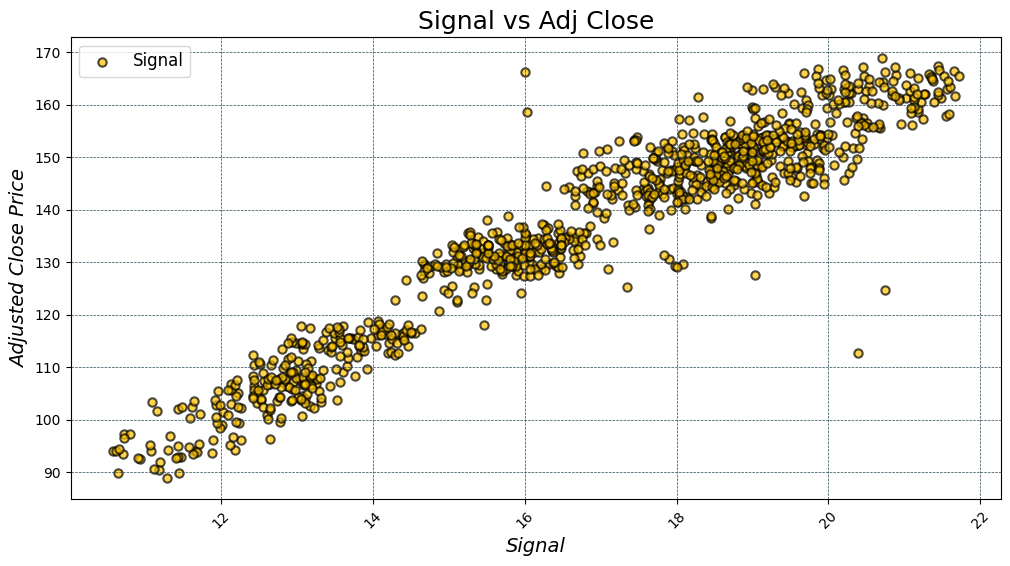

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data1['Signal'], data1['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Signal'], loc='upper left', fontsize=12)
plt.title('Signal vs Adj Close', fontsize=18)
plt.xlabel('Signal', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

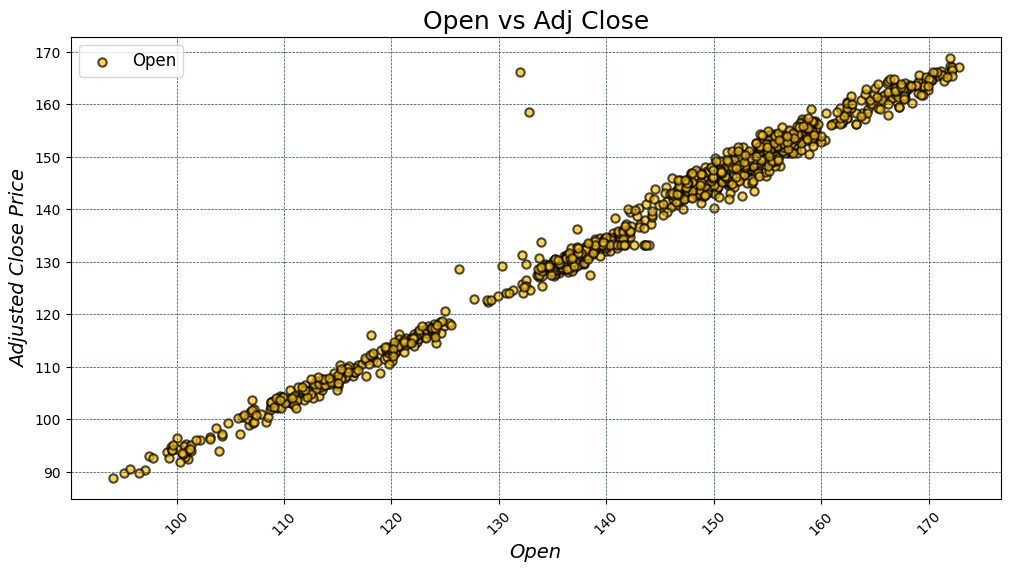

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data1['Open'], data1['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Open'], loc='upper left', fontsize=12)
plt.title('Open vs Adj Close', fontsize=18)
plt.xlabel('Open', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

In [ ]:
outlier=data1[(data1["Open"]<140)&(data1["Open"]>130)&(data1["Adj Close"]>150)]
outlier

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2016-12-05,16.011011,131.970001,133.330002,131.889999,133.149994,166.175079
2017-03-27,16.032241,132.759995,135.070007,132.399994,134.740005,158.577637


In [ ]:
data2 = data1[~data1.index.isin(outlier.index)]

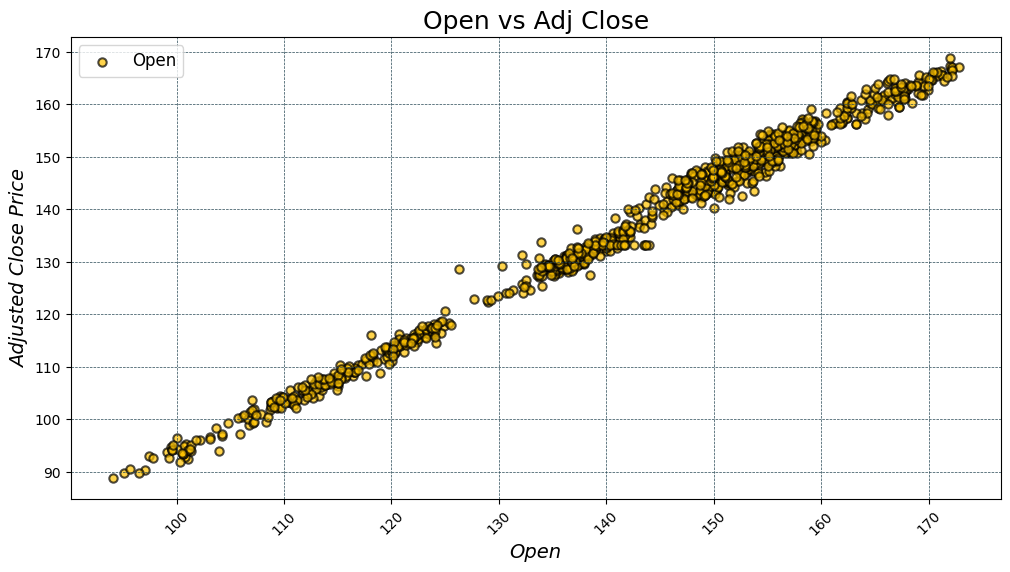

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data2['Open'], data2['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Open'], loc='upper left', fontsize=12)
plt.title('Open vs Adj Close', fontsize=18)
plt.xlabel('Open', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

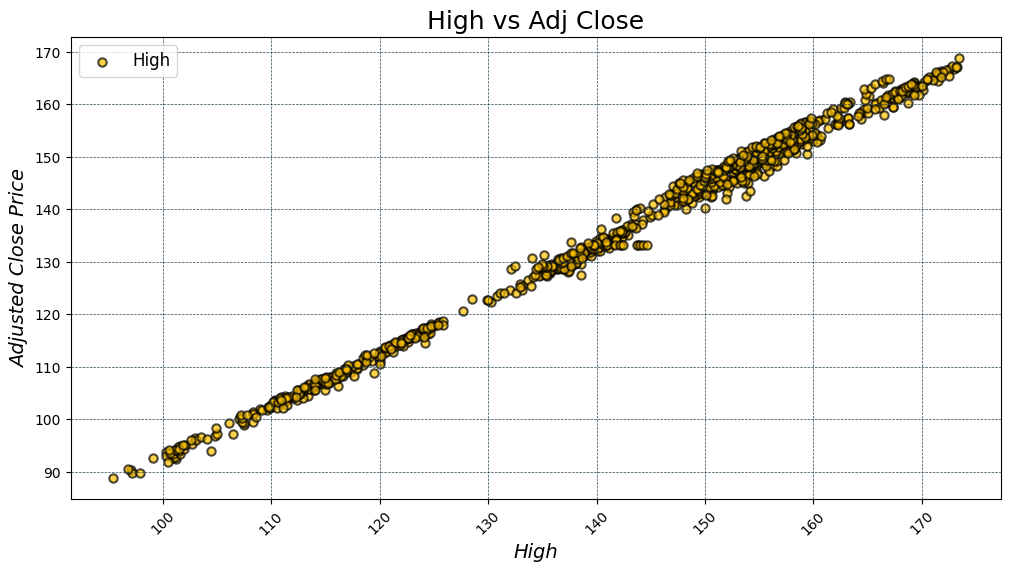

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data2['High'], data2['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['High'], loc='upper left', fontsize=12)
plt.title('High vs Adj Close', fontsize=18)
plt.xlabel('High', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

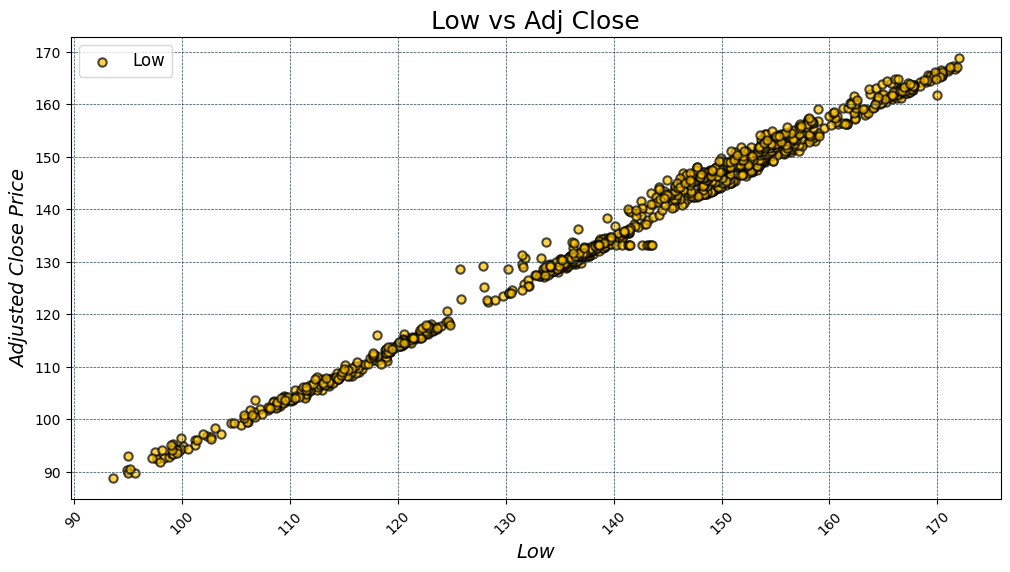

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data2['Low'], data2['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Low'], loc='upper left', fontsize=12)
plt.title('Low vs Adj Close', fontsize=18)
plt.xlabel('Low', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

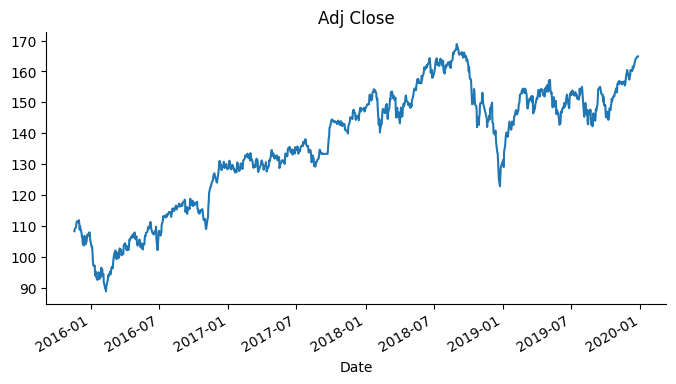

In [ ]:
data2['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

## Part II, Analyzing the Effectiveness of Signal Value

chose windows size 10

<ipython-input-30-126940d6b0ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[column_name] = data3['Adj Close'].rolling(ma).mean()
<ipython-input-30-126940d6b0ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[column_name] = data3['Adj Close'].rolling(ma).mean()
<ipython-input-30-126940d6b0ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

<Axes: title={'center': 'moving average'}, xlabel='Date'>

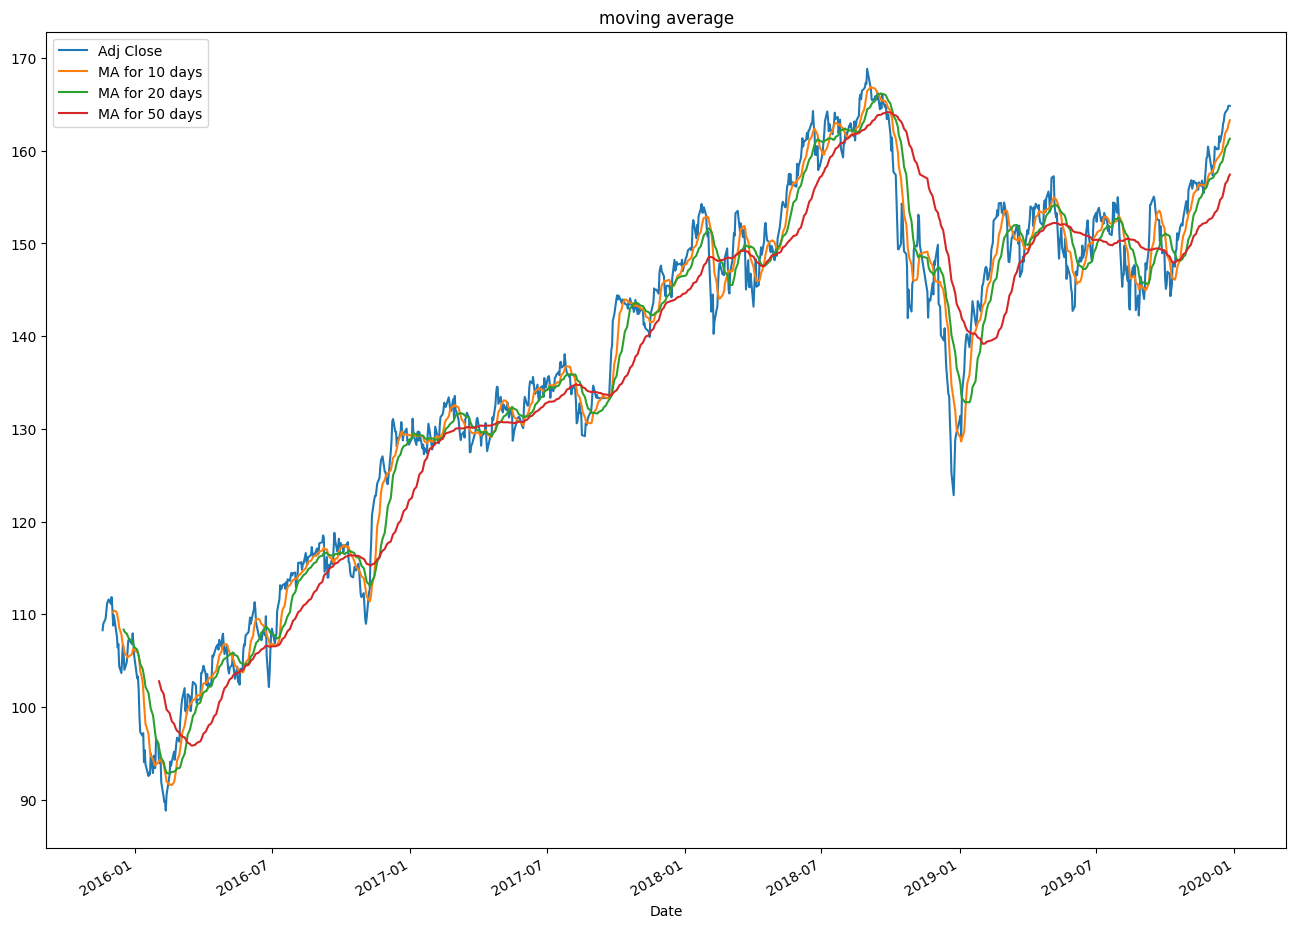

In [ ]:
data3=data2
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  data3[column_name] = data3['Adj Close'].rolling(ma).mean()

data3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(16, 12), title='moving average')

## Explain and discuss the effectiveness of the Signal Value using XAI

In [ ]:
df1=data2
df1.shape[0]

1027

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import shap

features = ['Signal', 'Open', 'High', 'Low', 'Close']
target = 'Adj Close'


split_date = '2019-01-01'
train = df1.loc[df1.index <= split_date]
test = df1.loc[df1.index > split_date]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [ ]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50
)


model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=50
)


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

[0]	validation_0-rmse:19.00969	validation_1-rmse:18.92712
[50]	validation_0-rmse:1.66952	validation_1-rmse:3.80521
[100]	validation_0-rmse:0.37484	validation_1-rmse:2.58059
[150]	validation_0-rmse:0.29756	validation_1-rmse:2.48481
[200]	validation_0-rmse:0.26330	validation_1-rmse:2.47894
[241]	validation_0-rmse:0.23878	validation_1-rmse:2.47965
RMSE: 2.48
MAE: 2.39
R²: 0.81


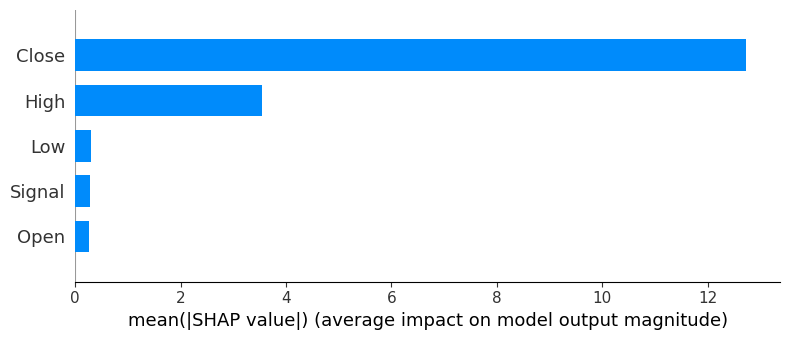

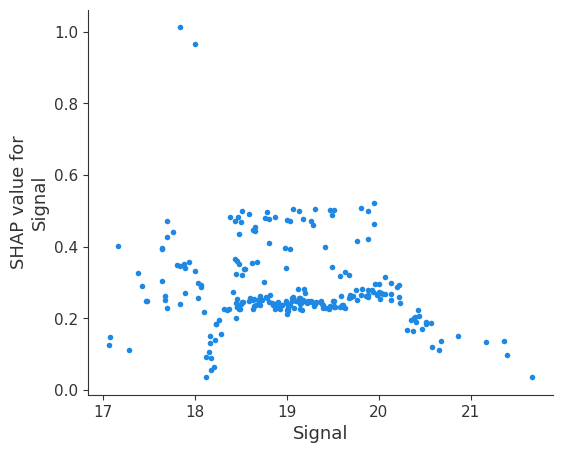

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, feature_names=features, plot_type='bar')


shap.dependence_plot(
    'Signal',
    shap_values,
    X_test,
    feature_names=features,
    interaction_index=None
)





An R2 value of 0.81 indicates that the model fits well and the predicted values are consistent with the actual changes. The SHAP summary graph shows that the mean SHAP value of close is the highest, indicating that close has the greatest impact on model prediction, while the signal feature has a smaller effect. When the signal characteristic value is in the range of 17 to 20, The large range of SHAP values indicates a complex impact on the model.



## Credit Plus Solution

###base on LSTM

In [ ]:
df=data2

In [ ]:
df.shape[0]

1027

In [ ]:
training_data_len = int(np.ceil( len(df) * .85 ))
training_data_len

873

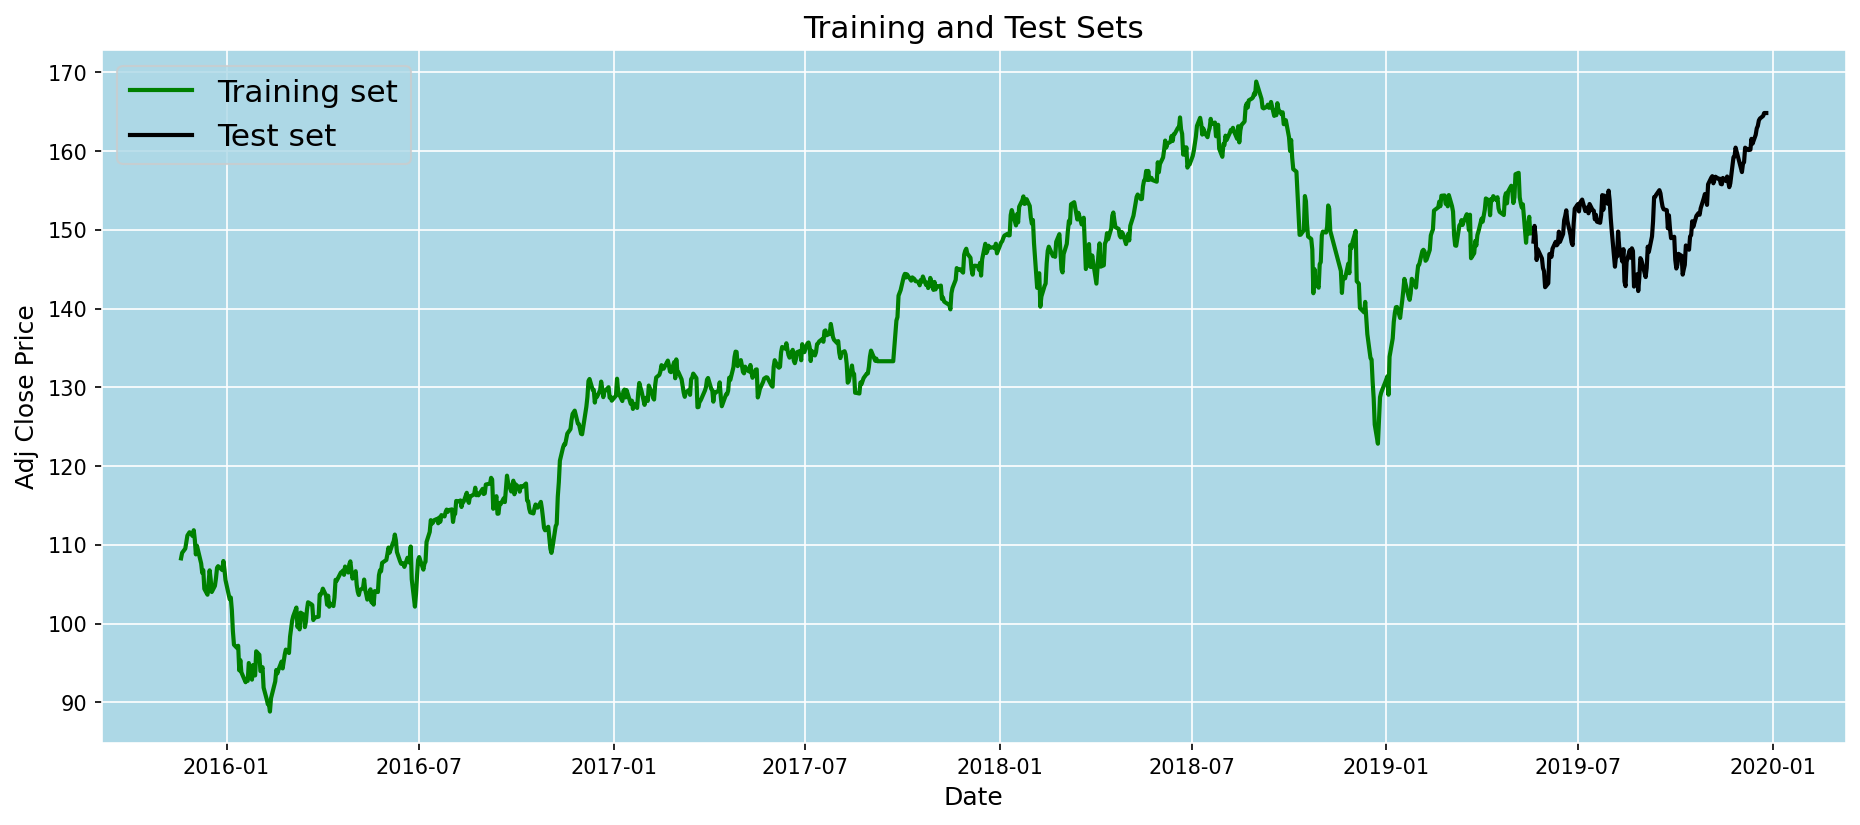

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.rc('axes',edgecolor='white')
plt.plot(df.index[:training_data_len], df['Adj Close'][:training_data_len], color='green', lw=2)
plt.plot(df.index[training_data_len:], df['Adj Close'][training_data_len:], color='black', lw=2)
plt.title('Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
features = df[['Signal', 'Open', 'High', 'Low', 'Close']].values
target = df['Adj Close'].values

In [ ]:
scaler_features = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))

In [ ]:
time_step = 10
train_features = features_scaled[0:int(training_data_len), :]
train_target = target_scaled[0:int(training_data_len), :]
X_train=[]
y_train=[]
for i in range(time_step, training_data_len):
        X_train.append(train_features[i-time_step:i])
        y_train.append(train_target[i])

X_train = np.array(X_train)
y_train = np.array(y_train)
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (863, 10, 5)
y_train.shape (863, 1)


In [ ]:
test_features = features_scaled[training_data_len: , :]
test_target = target_scaled[training_data_len: , :]
X_test = []
y_test = []
for i in range(time_step, len(test_features)):
    X_test.append(test_features[i-time_step:i])
    y_test.append(test_target[i])

X_test = np.array(X_test)
y_test = np.array(y_test)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

X_test.shape (144, 10, 5)
y_test.shape (144, 1)


In [ ]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)
model.save('lstm_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0988 - val_loss: 0.0252
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096 - val_loss: 0.0056
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - val_loss: 0.0017


In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_target.inverse_transform(y_pred_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred_scaled)
MAPE = mean_absolute_percentage_error(y_test, y_pred_scaled)
Accuracy = 1 - MAPE
print(f'Test Mean Squared Error: {mse}')
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Mean Squared Error: 0.0014275942726324
Test MAPE: 0.04004748540412666
Test Accuracy: 0.9599525145958734


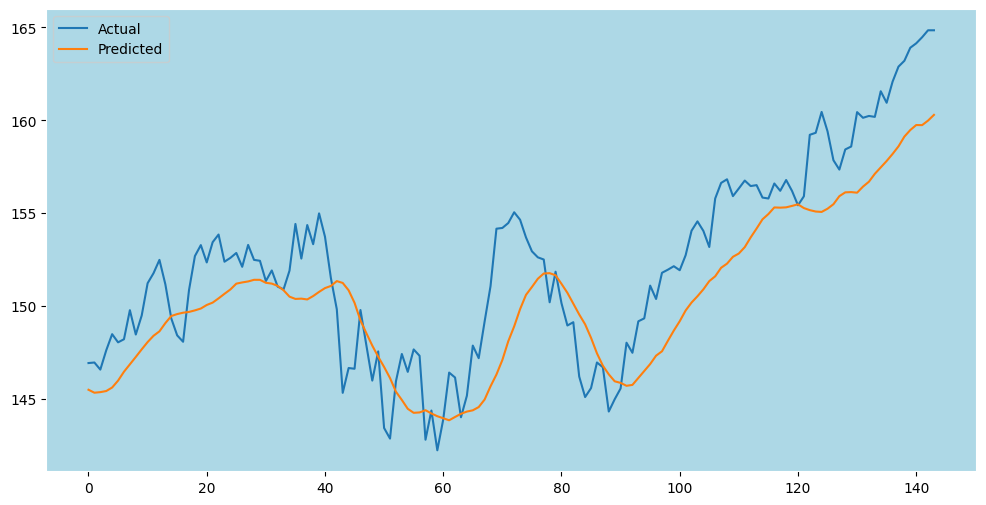

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaler_target.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

####SHAP analyse

In [ ]:
print("X_train shape:", X_train.shape)
model_1 = load_model('lstm_model.h5')

X_train shape: (863, 10, 5)


In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
background.shape

(100, 10, 5)

In [ ]:
explainer = shap.GradientExplainer(model_1, background)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(144, 10, 5))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 10, 5))']
  warnings.warn(msg)


In [ ]:
shap_values = np.squeeze(shap_values, 3)
shap_values.shape

(144, 10, 5)

In [ ]:
X_test_flat = X_test.reshape(-1, X_test.shape[-1])
shap_values_flat = shap_values.reshape(-1, shap_values.shape[-1])

In [ ]:
X_test_flat.shape

(1440, 5)

In [ ]:
shap_values_flat.shape

(1440, 5)

In [ ]:
features = ['Signal', 'Open', 'High', 'Low', 'Close']

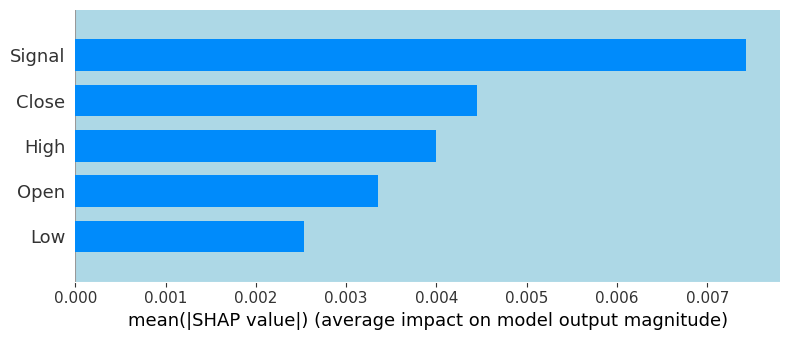

In [ ]:
shap.summary_plot(shap_values_flat, X_test_flat, feature_names=features, plot_type='bar')



The SHAP summary graph shows that the mean SHAP value of signal is the highest, indicating that signal has the greatest impact on model prediction

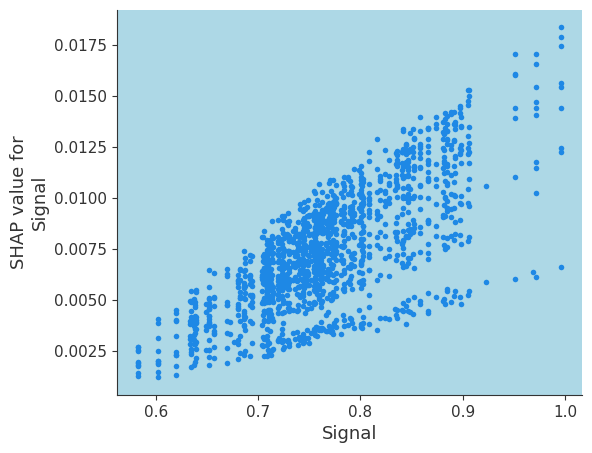

In [ ]:
shap.dependence_plot(
    'Signal',
    shap_values_flat,
    X_test_flat,
    feature_names=features,
    interaction_index=None
)

When the signal characteristic value is within the range of 0.7 to 0.9, The large range of SHAP values indicates a complex impact on the model.

FIN